In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
plt.style.use("fivethirtyeight")

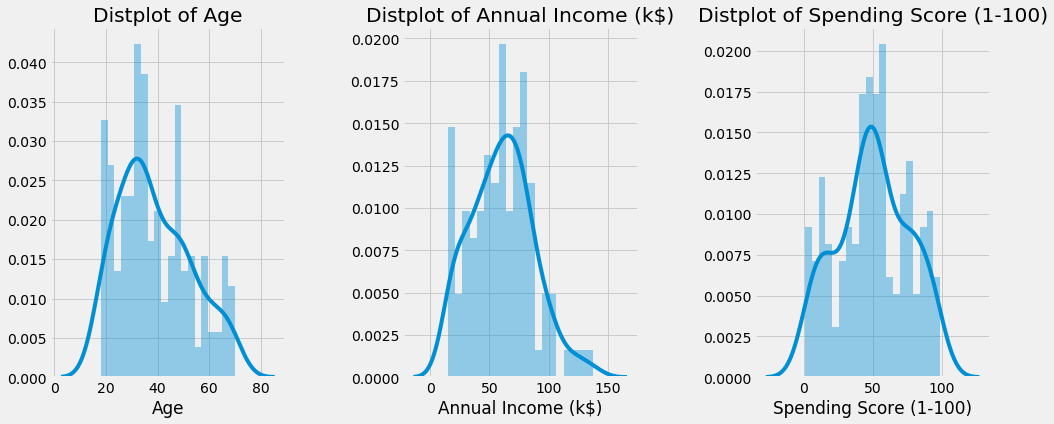

In [9]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

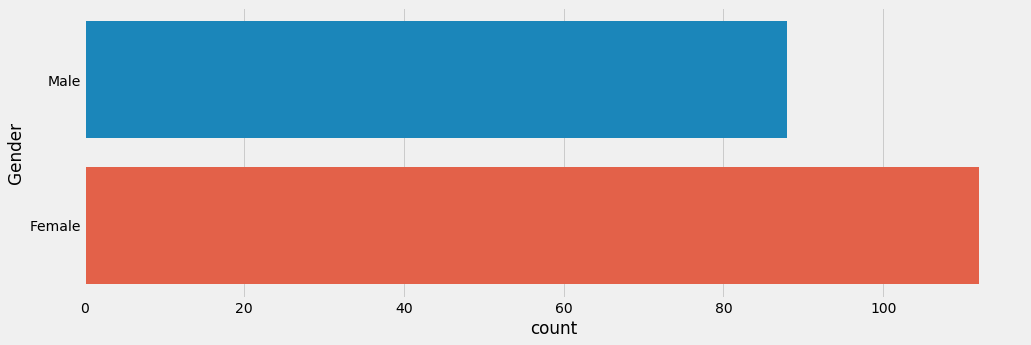

In [10]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender', data =df)
plt.show()

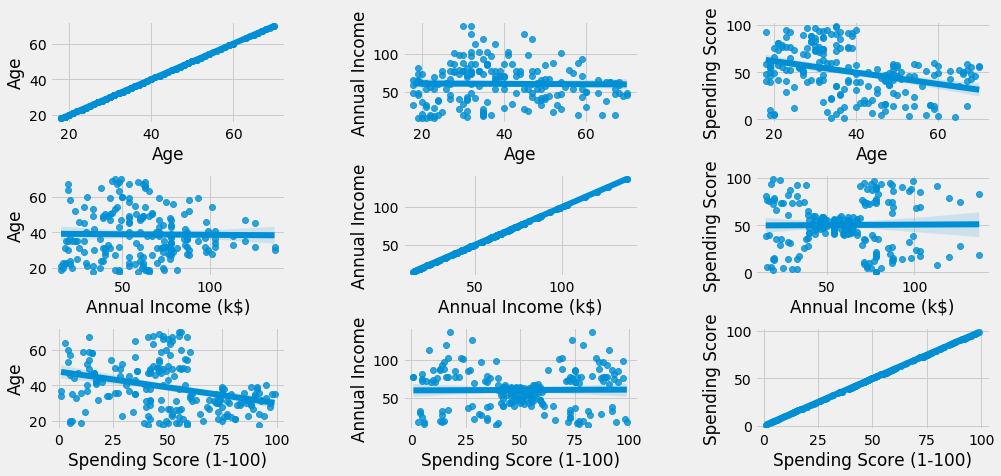

In [11]:
#Ploting the Relation between Age , Annual Income and Spending Score¶
plt.figure(1, figsize = (15, 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

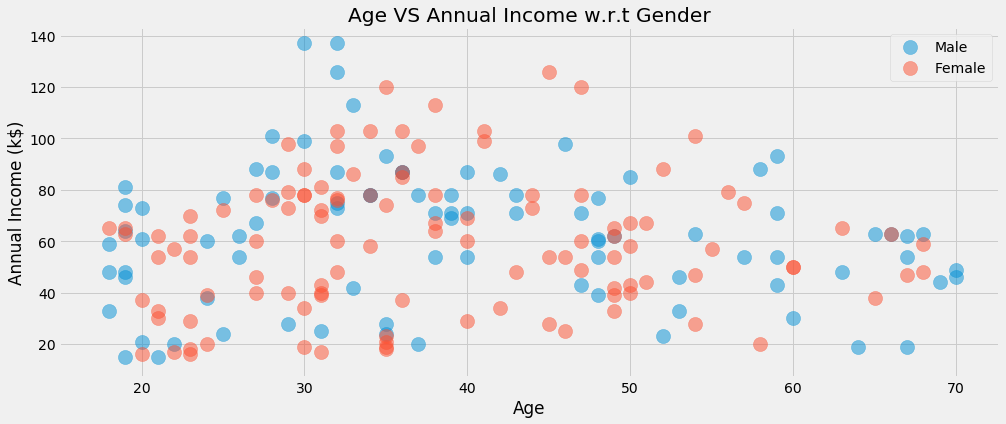

In [12]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = df[df['Gender'] == gender],s = 200, alpha=0.5, label = gender )
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age VS Annual Income w.r.t Gender')
plt.legend()
plt.show()

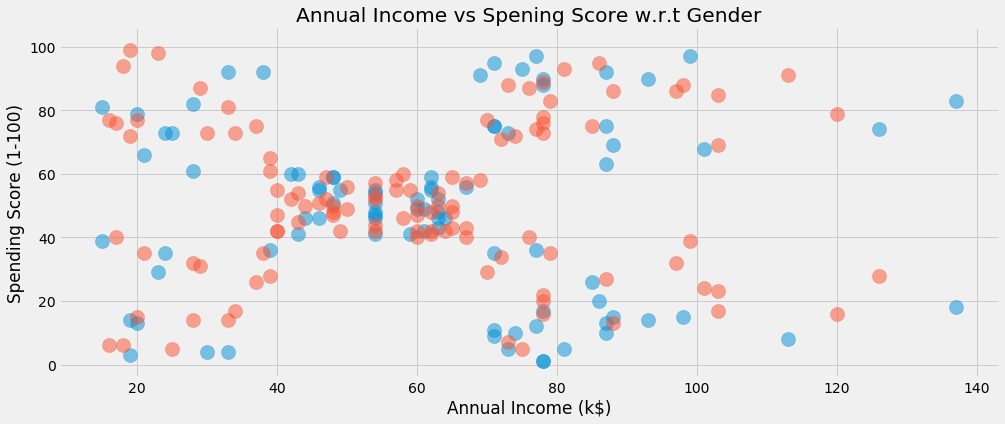

In [13]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df[df['Gender'] == gender], s = 200, alpha=0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spening Score w.r.t Gender')
plt.show()

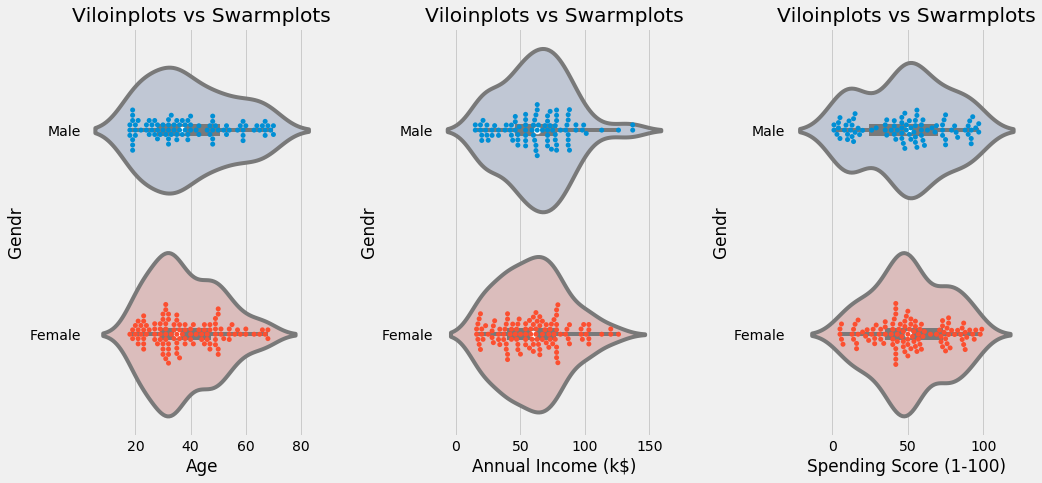

In [14]:
#Distribution of values in Age , Annual Income and Spending Score according to Gender
plt.figure(1, figsize = (15, 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5 )
    sns.violinplot(x = x, y = 'Gender', data = df, palette ='vlag' )
    sns.swarmplot(x = x, y = 'Gender', data = df )
    plt.ylabel('Gendr')
    plt.title('Viloinplots vs Swarmplots')
plt.show()

In [15]:
#Clustering using K- means
#Segmentation using Age , Annual Income and Spending Score
new_data = df[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(new_data)
    inertia.append(algorithm.inertia_)

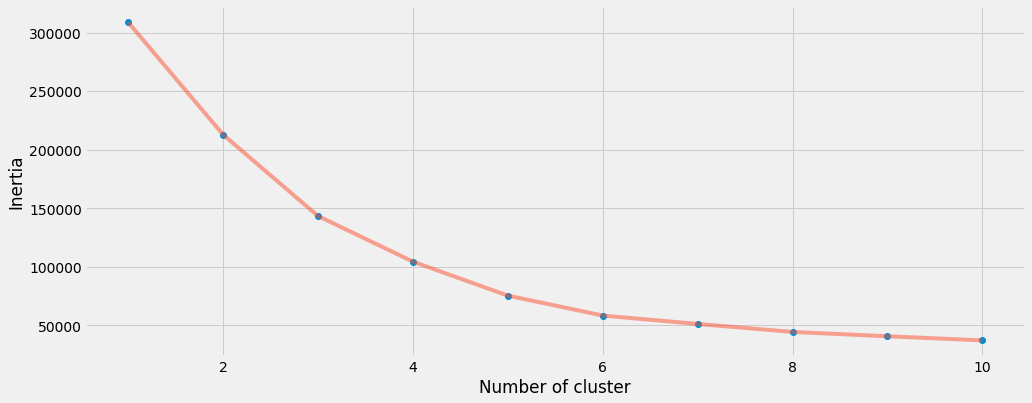

In [16]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of cluster'), plt.ylabel('Inertia')
plt.show()

In [17]:
algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init = 10, max_iter=300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
algorithm.fit(new_data)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [18]:
df['labels'] = labels
trace = go.Scatter3d(x = df['Age'], y = df['Annual Income (k$)'], z = df['Spending Score (1-100)'], mode = 'markers',
                    marker = dict(color = df['labels'], size = 20, line = dict(color = df['labels'], width = 12), opacity = 0.8))
data = [trace]
layout = go.Layout(title = 'Clusters', scene = dict(xaxis = dict(title = 'Age'), yaxis = dict(title = 'Annual Income'), zaxis = dict(title = 'Spending Score')))
fig = go.Figure(data = data, layout = layout)
fig